In [3]:
# %matplotlib notebook

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
t = 10
filename='A304_MR_Data\\A304_10K.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value'])
df['multiplier'] = 10**6
df
(df['V5'],df['V6']) = (df['V6'], df['V5'])
(df['V7'],df['V8']) = (df['V8'], df['V7']) 

# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

In [6]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df['B'] = df['B_int']
df = df[["I", "B","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value', 'multiplier']].copy()
df.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,Rel_value,multiplier
0,0.001,10000,9.999736,1679.227229,-1679.158481,1451.436988,-1451.416593,1677.774083,-1677.786242,1452.147422,-1452.035691,4.934000e-07,1000000
1,0.001,9000,10.000000,1679.831673,-1679.732849,1452.407161,-1452.358480,1678.405235,-1678.413460,1453.089954,-1452.933522,4.918000e-07,1000000
2,0.001,8000,10.000000,1680.437592,-1680.355281,1453.327738,-1453.285787,1679.021551,-1679.002159,1453.984728,-1453.835170,4.954000e-07,1000000
3,0.001,7000,10.000052,1681.015517,-1680.943335,1454.239662,-1454.202220,1679.651040,-1679.682597,1454.885903,-1454.698042,5.068000e-07,1000000
4,0.001,6000,10.000069,1681.623451,-1681.526702,1455.131775,-1455.109584,1680.255336,-1680.286329,1455.782673,-1455.651330,5.342000e-07,1000000


In [7]:
df['R1'] = df['V1']/(df['multiplier']*df['I'])
df['R2'] = df['V2']/(df['multiplier']*df['I'])
df['R3'] = df['V3']/(df['multiplier']*df['I'])
df['R4'] = df['V4']/(df['multiplier']*df['I'])
df['R5'] = df['V5']/(df['multiplier']*df['I'])
df['R6'] = df['V6']/(df['multiplier']*df['I'])
df['R7'] = df['V7']/(df['multiplier']*df['I'])
df['R8'] = df['V8']/(df['multiplier']*df['I'])

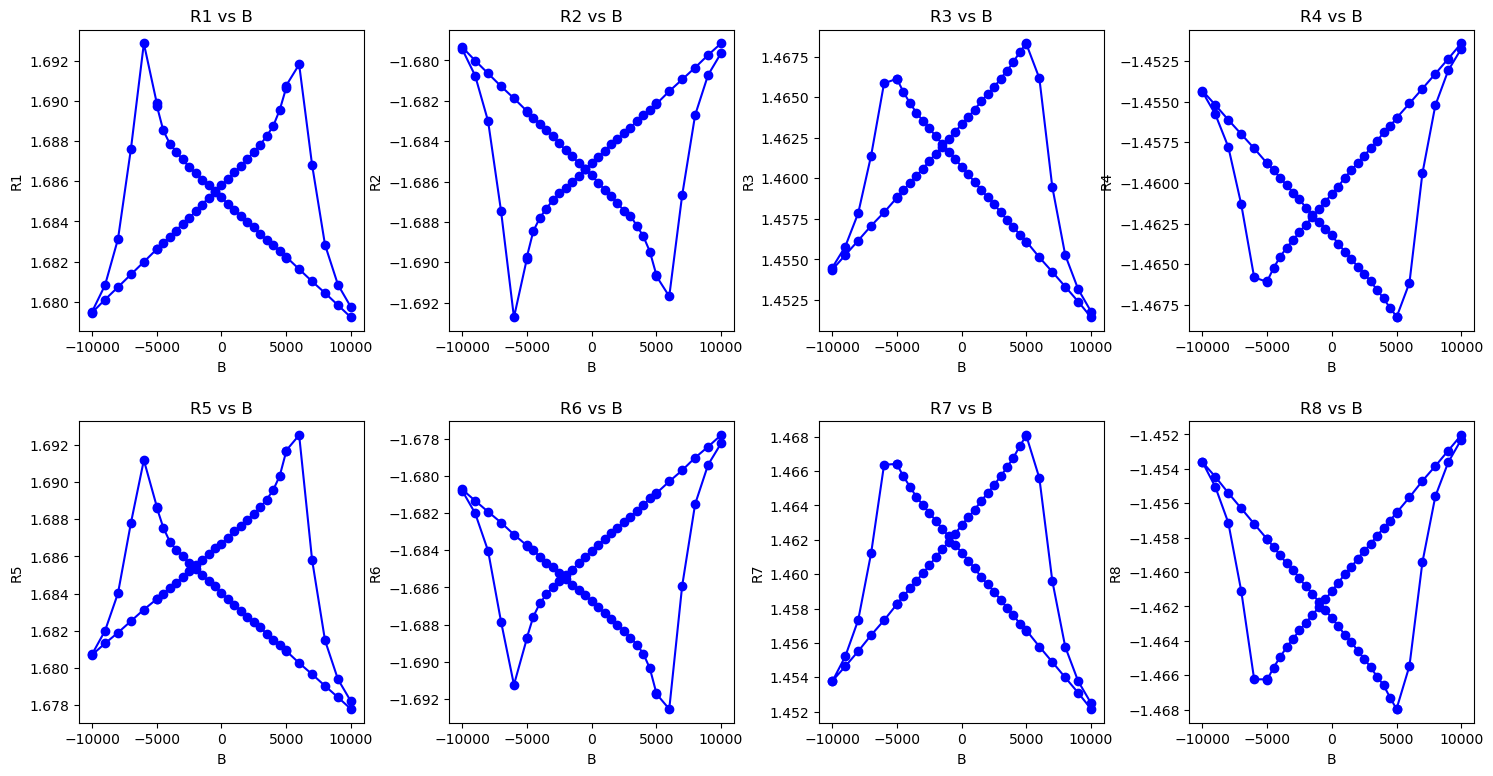

In [8]:
plt.figure(figsize=(18,9))
plt.subplot(2,4,1)
plt.plot(df['B'],df['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')

plt.subplot(2,4,2)
plt.plot(df['B'],df['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')

plt.subplot(2,4,3)
plt.plot(df['B'],df['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,4,4)
plt.plot(df['B'],df['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplot(2,4,5)
plt.plot(df['B'],df['R5'], 'bo-')
plt.title('R5 vs B')
plt.ylabel('R5')
plt.xlabel('B')
plt.subplot(2,4,6)
plt.plot(df['B'],df['R6'], 'bo-')
plt.title('R6 vs B')
plt.ylabel('R6')
plt.xlabel('B')
plt.subplot(2,4,7)
plt.plot(df['B'],df['R7'], 'bo-')
plt.title('R7 vs B')
plt.ylabel('R7')
plt.xlabel('B')
plt.subplot(2,4,8)
plt.plot(df['B'],df['R8'], 'bo-')
plt.title('R8 vs B')
plt.ylabel('R8')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

## MR Calculation without Field correction

### Ra -> Average Resistance of Two opposite sides

### Rb -> Average Resistance of Other two opposite sides

### R -> Average Resistance

In [9]:
df['Ra'] = (df['R1'] + df['R5'] - df['R2'] - df['R6'])/4
df['Rb'] = (df['R3'] + df['R7'] - df['R4'] - df['R8'])/4
df['R'] = (df['Ra'] + df['Rb'])/2

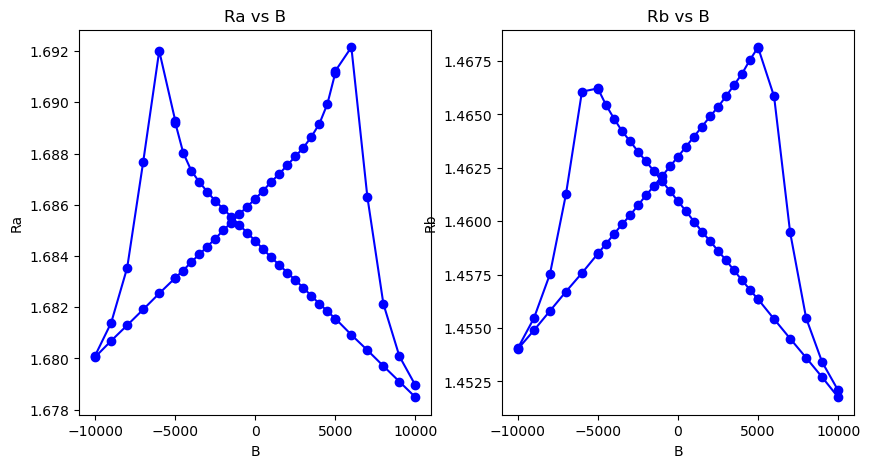

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(df['B'], df['Ra'],'bo-')
plt.title('Ra vs B')
plt.ylabel('Ra')
plt.xlabel('B')

plt.subplot(1,2,2)
plt.plot(df['B'], df['Rb'],'bo-')
plt.title('Rb vs B')
plt.ylabel('Rb')
plt.xlabel('B')

plt.show()

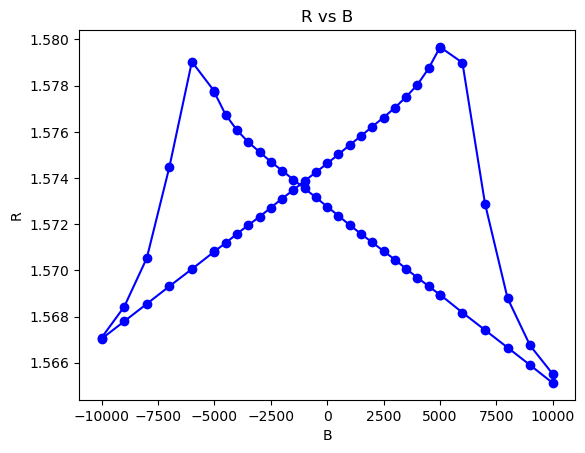

In [11]:
plt.plot(df['B'], df['R'],'bo-')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Comparing MR of Ra, Rb, R

In [12]:
Ra0 = df.loc[df['B'] == 0]['Ra'].mean()
Rb0 = df.loc[df['B'] == 0]['Rb'].mean()
R0 = df.loc[df['B'] == 0]['R'].mean()

df['MRa'] = ((df['Ra'] - Ra0)*100)/Ra0
df['MRb'] = ((df['Rb'] - Rb0)*100)/Rb0
df['MR'] = ((df['R'] - R0)*100)/R0

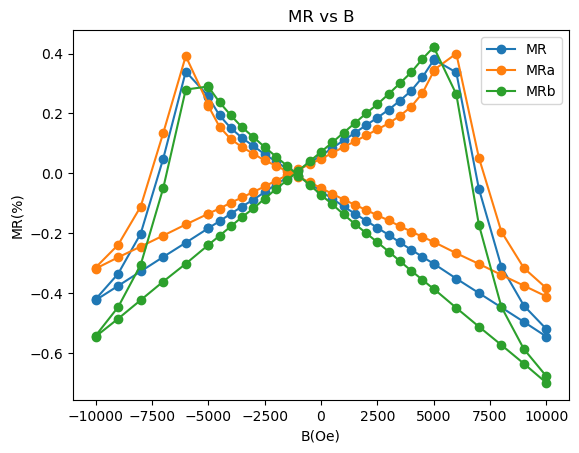

(None, 100, 10, 200)

In [13]:
plt.plot(df['B'], df['MR'], 'o-', label = "MR")
plt.plot(df['B'], df['MRa'], 'o-', label = "MRa")
plt.plot(df['B'], df['MRb'], 'o-', label = "MRb")
plt.title('MR vs B')
plt.ylabel('MR(%)')
plt.xlabel('B(Oe)')
plt.legend()
plt.show(), 100, 10, 200

# MR calculation with Field Correction

Averageing the current Reverse part

In [14]:
df['V1'] = (df['V1'] - df['V2'])/2
df['V2'] = (df['V3'] - df['V4'])/2
df['V3'] = (df['V5'] - df['V6'])/2
df['V4'] = (df['V7'] - df['V8'])/2

In [15]:
df = df[['I','B','V1','V2','V3','V4',"multiplier"]].copy()
df.head()

,I,B,V1,V2,V3,V4,multiplier
0,0.001,10000,1679.192855,1451.426790,1677.780162,1452.091557,1000000
1,0.001,9000,1679.782261,1452.382820,1678.409348,1453.011738,1000000
2,0.001,8000,1680.396437,1453.306763,1679.011855,1453.909949,1000000
3,0.001,7000,1680.979426,1454.220941,1679.666818,1454.791972,1000000
4,0.001,6000,1681.575076,1455.120680,1680.270832,1455.717001,1000000


In [16]:
min_B = df['B'].min()
max_B = df['B'].max()
print(min_B, max_B)

-10000 10000


In [17]:
B_min_idx = 0
for i in range(len(df)):
    if(df['B'].iloc[i]== min_B): 
        B_min_idx = i
        break

### Creating dec Field dataset

In [18]:
df_dec = df.iloc[ : B_min_idx+1].copy()
df_inc = df.iloc[B_min_idx+1 : ].copy()

data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1)
data_dec = data_dec[data_dec['B_x'] == -1*data_dec['B_y']] # selecting 
data_dec = data_dec[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns
data_dec.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [19]:
data_dec['V15'] = (data_dec['V1'] + data_dec['V5'])/2
data_dec['V26'] = (data_dec['V2'] + data_dec['V6'])/2
data_dec['V37'] = (data_dec['V3'] + data_dec['V7'])/2
data_dec['V48'] = (data_dec['V4'] + data_dec['V8'])/2

In [20]:
data_dec.head()

,I,B,V1,V2,V3,V4,V5,V6,V7,V8,multiplier,V15,V26,V37,V48
0,0.001,10000,1679.192855,1451.426790,1677.780162,1452.091557,1679.402727,1454.346227,1680.706228,1453.692504,1000000,1679.297791,1452.886508,1679.243195,1452.892030
34,0.001,9000,1679.782261,1452.382820,1678.409348,1453.011738,1680.060388,1455.237648,1681.320123,1454.544045,1000000,1679.921324,1453.810234,1679.864735,1453.777891
68,0.001,8000,1680.396437,1453.306763,1679.011855,1453.909949,1680.687469,1456.141731,1681.906093,1455.454235,1000000,1680.541953,1454.724247,1680.458974,1454.682092
102,0.001,7000,1680.979426,1454.220941,1679.666818,1454.791972,1681.319648,1457.035555,1682.506535,1456.371213,1000000,1681.149537,1455.628248,1681.086677,1455.581593
136,0.001,6000,1681.575076,1455.120680,1680.270832,1455.717001,1681.932452,1457.888414,1683.143459,1457.255159,1000000,1681.753764,1456.504547,1681.707145,1456.486080


In [21]:
# data_dec['Ra'] = (data_dec['V15'] + data_dec['V37'])/(2*data_dec['I']*data_dec['multiplier'])
# data_dec['Rb'] = (data_dec['V26'] + data_dec['V48'])/(2*data_dec['I']*data_dec['multiplier'])
# data_dec['R'] = (data_dec['Ra'] + data_dec['Rb'])/2

### Creating Increasing Field Dataset

In [22]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1)
data_inc = data_inc[data_inc['B_x'] == -1*data_inc['B_y']] # selecting 
data_inc = data_inc[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns
data_inc.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [23]:
data_inc['V15'] = (data_inc['V1'] + data_inc['V5'])/2
data_inc['V26'] = (data_inc['V2'] + data_inc['V6'])/2
data_inc['V37'] = (data_inc['V3'] + data_inc['V7'])/2
data_inc['V48'] = (data_inc['V4'] + data_inc['V8'])/2

In [24]:
data_inc.head()

,I,B,V1,V2,V3,V4,V5,V6,V7,V8,multiplier,V15,V26,V37,V48
0,0.001,-10000,1679.402727,1454.346227,1680.706228,1453.692504,1679.192855,1451.426790,1677.780162,1452.091557,1000000,1679.297791,1452.886508,1679.243195,1452.892030
34,0.001,-9000,1680.060388,1455.237648,1681.320123,1454.544045,1679.782261,1452.382820,1678.409348,1453.011738,1000000,1679.921324,1453.810234,1679.864735,1453.777891
68,0.001,-8000,1680.687469,1456.141731,1681.906093,1455.454235,1680.396437,1453.306763,1679.011855,1453.909949,1000000,1680.541953,1454.724247,1680.458974,1454.682092
102,0.001,-7000,1681.319648,1457.035555,1682.506535,1456.371213,1680.979426,1454.220941,1679.666818,1454.791972,1000000,1681.149537,1455.628248,1681.086677,1455.581593
136,0.001,-6000,1681.932452,1457.888414,1683.143459,1457.255159,1681.575076,1455.120680,1680.270832,1455.717001,1000000,1681.753764,1456.504547,1681.707145,1456.486080


### Stacking both the datas

In [25]:
data = pd.concat([data_dec,data_inc])

In [26]:
data['Ra'] = (data['V15'] + data['V37'])/(2*data['I']*data['multiplier'])
data['Rb'] = (data['V26'] + data['V48'])/(2*data['I']*data['multiplier'])
data['R'] = (data['Ra'] + data['Rb'])/2

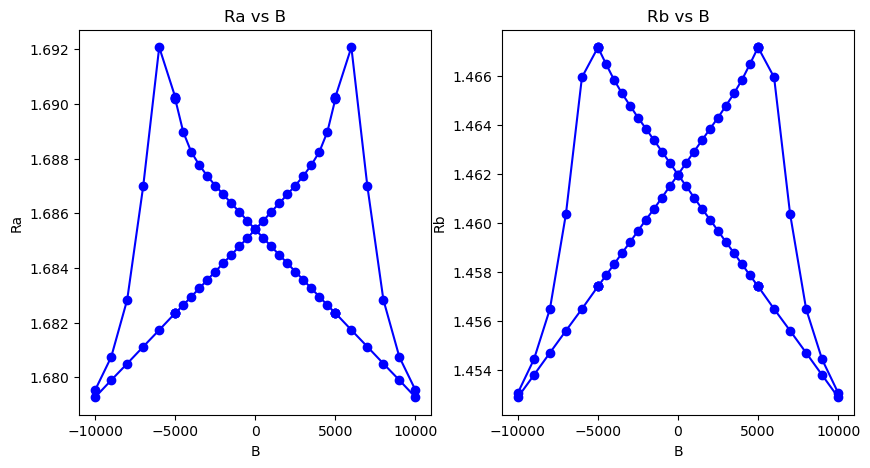

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(data['B'], data['Ra'],'bo-')
plt.title('Ra vs B')
plt.ylabel('Ra')
plt.xlabel('B')

plt.subplot(1,2,2)
plt.plot(data['B'], data['Rb'],'bo-')
plt.title('Rb vs B')
plt.ylabel('Rb')
plt.xlabel('B')

plt.show()

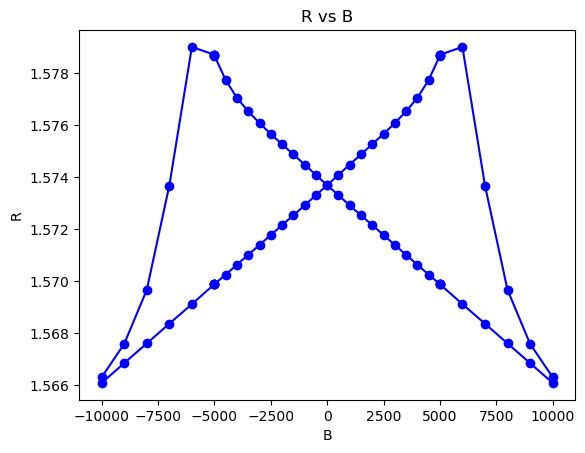

In [28]:
plt.plot(data['B'],data['R'],'bo-')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Comparing MR of Ra, Rb, R

In [29]:
Ra0 = data.loc[data['B'] == 0]['Ra'].mean()
Rb0 = data.loc[data['B'] == 0]['Rb'].mean()
R0 = data.loc[data['B'] == 0]['R'].mean()

data['MRa'] = ((data['Ra'] - Ra0)*100)/Ra0
data['MRb'] = ((data['Rb'] - Rb0)*100)/Rb0
data['MR'] = ((data['R'] - R0)*100)/R0

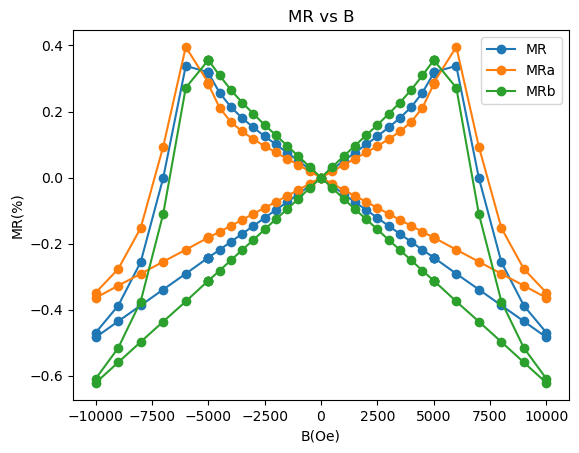

In [30]:
plt.plot(data['B'], data['MR'], 'o-', label = "MR")
plt.plot(data['B'], data['MRa'], 'o-', label = "MRa")
plt.plot(data['B'], data['MRb'], 'o-', label = "MRb")
plt.title('MR vs B')
plt.ylabel('MR(%)')
plt.xlabel('B(Oe)')
plt.legend()
plt.show()

In [31]:
data.to_pickle(f"./pickle_data/MR_{t}K.pkl")